# Importing libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, precision_score, recall_score, precision_recall_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score

# Loading train and test data

## Train Data

In [2]:
msg_train = pd.read_csv('train.csv')
msg_train

,label,message,length
0,1,"['free2day', 'sexy', 'st', 'george', ""'s"", 'da...",26
1,0,"['armand', 'say', 'get', 'as', 'epsilon']",5
2,0,"['lol', 'i', ""'m"", 'hot', 'air', 'balloon', '!']",7
3,0,"['you', 'know', ',', 'wot', 'people', 'wear', ...",21
4,0,"['good', 'morning', ',', 'love', '...', 'i', '...",27
...,...,...,...
4454,0,"['hi', ',', 'wlcome', 'back', ',', 'wonder', '...",13
4455,1,"['ree', 'entry', '2', 'weekly', 'comp', 'chanc...",27
4456,0,"['``', 'oh', 'fuck', '.', 'juswoke', 'up', 'in...",31
4457,0,"['not', 'much', 'no', 'fights', '.', 'it', 'wa...",12


## Test Data

In [3]:
msg_test = pd.read_csv('test.csv')
msg_test

,label,message,length
0,0,"['you', 'still', 'coming', 'tonight', '?']",5
1,0,"['``', 'hey', 'babe', '!', 'far', '2', 'spun-o...",46
2,0,"['ya', 'even', 'cooky', 'jelly']",4
3,0,"['sorry', ""'ve"", 'gone', 'place', '.', 'i.ll',...",11
4,0,"['when', 'going', 'ride', 'bike', '?']",5
...,...,...,...
1110,0,"['my', 'supervisor', 'find', '4', 'one', 'lor'...",19
1111,1,"['bored', 'housewife', '!', 'chat', 'n', 'date...",14
1112,0,"['rose', 'red', ',', 'red', 'blood', ',', 'blo...",59
1113,0,"['also', 'remember', 'bead', ""n't"", 'come', '....",8


# Model Selection

We choose to use the following three models for spam/ham classification and record their Accuracy, Precision, Recall, F1-score and Area under the Precision-Recall respectively.

1. Naive Bayes
2. Logistic Regression
3. Support Vector Machine

In [4]:
models = ['Naive Bayes', 'Logistic Regression', 'Support Vector Machines']
f1 = []
acc = []
precision = []
recall = []
pr_auc = []

# 1. Naive Bayes Classifier

In [5]:
MultinomialNB().get_params() # Multinomial Naive Bayes

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

## Creating pipeline

In [6]:
pipeline_nb = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Cross Validation Scores

In [7]:
scores = cross_val_score(pipeline_nb,  # steps to convert raw messages into models
                         msg_train['message'],  # training data
                         msg_train['label'],  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )
scores

array([0.96412556, 0.97982063, 0.96412556, 0.97757848, 0.96636771,
       0.97533632, 0.9529148 , 0.97982063, 0.96412556, 0.9505618 ])

In [8]:
scores.mean(), scores.std()

(np.float64(0.9674777044389581), np.float64(0.010008235582897696))

## Fitting the model

In [9]:
param_grid = {
    'classifier__alpha': [0.1, 0.2, 0.5, 1],
}

NB_Classifier = GridSearchCV(pipeline_nb, param_grid, cv=5, scoring='f1', verbose=3, n_jobs=-1)
NB_Classifier.fit(msg_train['message'], msg_train['label'])

print("Best parameters:", NB_Classifier.best_params_)
print("Best score:", NB_Classifier.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[CV 3/5] END .............classifier__alpha=0.1;, score=0.946 total time=   0.2s
[CV 5/5] END .............classifier__alpha=0.1;, score=0.924 total time=   0.2s
[CV 4/5] END .............classifier__alpha=0.2;, score=0.927 total time=   0.2s
[CV 1/5] END .............classifier__alpha=0.2;, score=0.952 total time=   0.2s
[CV 3/5] END .............classifier__alpha=0.2;, score=0.941 total time=   0.2s
[CV 2/5] END .............classifier__alpha=0.2;, score=0.960 total time=   0.2s
[CV 4/5] END .............classifier__alpha=0.1;, score=0.937 total time=   0.3s
[CV 1/5] END .............classifier__alpha=0.5;, score=0.922 total time=   0.2s
[CV 2/5] END .............classifier__alpha=0.5;, score=0.946 total time=   0.2s
[CV 5/5] END .............classifier__alpha=0.2;, score=0.910 total time=   0.3s
[CV 3/5] END .............classifier__alpha=0.5;, score=0.896 total time=   0.2s
[CV 2/5] END ...............classifier__alpha=1;, score=0.870 total time=   0.2s
[CV 4/5] END .............cl

## Performance on Train Data

### Accuracy

In [10]:
predictions = NB_Classifier.predict(msg_train['message'])
accuracy_score(msg_train['label'], predictions)

0.9979816102265082

### Precision

In [11]:
precision_score(msg_train['label'], predictions)

1.0

### Recall

In [12]:
recall_score(msg_train['label'], predictions)

0.984641638225256

### F1 Score

In [13]:
f1_score(msg_train['label'], predictions, pos_label=1)

0.9922613929492692

### Precision-Recall Curve

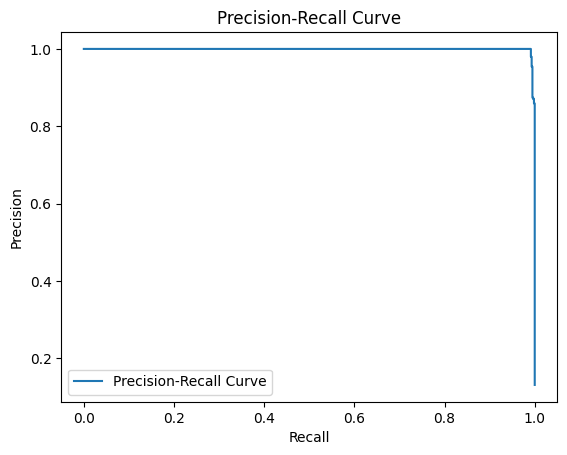

In [14]:
p, r, t = precision_recall_curve(msg_train['label'], NB_Classifier.predict_proba(msg_train['message'])[:,1],pos_label=1)
# plot the curve
plt.plot(r, p, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [15]:
auc_pr = auc(r,p)
# print the area under the curve
print('Area under the Precision-Recall Curve:', auc_pr)

Area under the Precision-Recall Curve: 0.9992110026145932


### Confusion Matrix

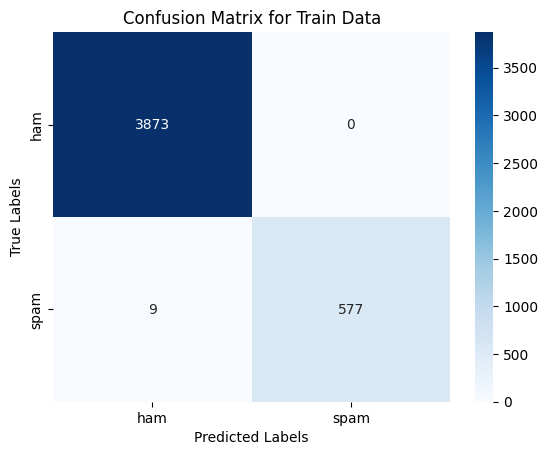

In [16]:
cm = confusion_matrix(msg_train['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Train Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Classification Report

In [17]:
print(classification_report(msg_train['label'], predictions, digits=4))

              precision    recall  f1-score   support

           0     0.9977    1.0000    0.9988      3873
           1     1.0000    0.9846    0.9923       586

    accuracy                         0.9980      4459
   macro avg     0.9988    0.9923    0.9956      4459
weighted avg     0.9980    0.9980    0.9980      4459



## Performance on Test Data

### Accuracy

In [18]:
predictions = NB_Classifier.predict(msg_test['message'])
accuracy = accuracy_score(msg_test['label'], predictions)
accuracy

0.9865470852017937

In [19]:
acc.append(accuracy)

### Precision

In [20]:
p = precision_score(msg_test['label'], predictions)
p

1.0

In [21]:
precision.append(p)

### Recall

In [22]:
r = recall_score(msg_test['label'], predictions)
r

0.906832298136646

In [23]:
recall.append(r)

### F1 Score

In [24]:
f = f1_score(msg_test['label'], predictions, pos_label=1)
f

0.9511400651465798

In [25]:
f1.append(f)

### Precision-Recall Curve

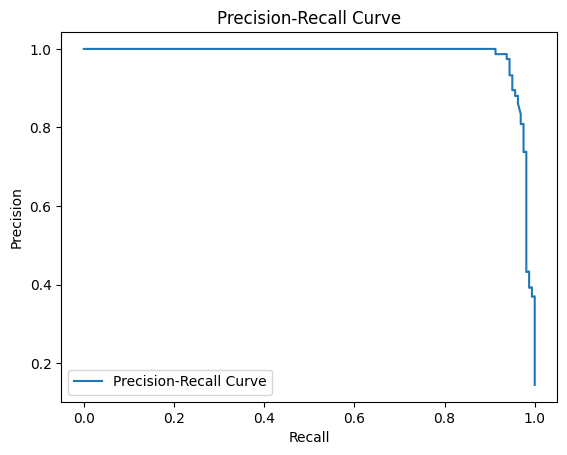

In [26]:
p, r, t = precision_recall_curve(msg_test['label'], NB_Classifier.predict_proba(msg_test['message'])[:,1],pos_label=1)
# plot the curve
plt.plot(r, p, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [27]:
auc_pr = auc(r,p)
# print the area under the curve
print('Area under the Precision-Recall Curve:', auc_pr)

Area under the Precision-Recall Curve: 0.9827191491550886


In [28]:
pr_auc.append(auc_pr)

### Confusion Matrix

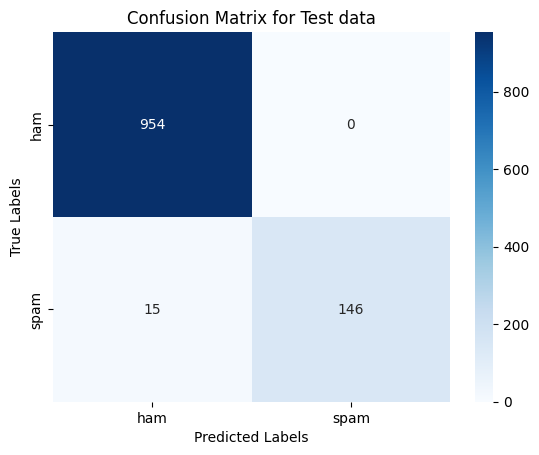

In [29]:
cm = confusion_matrix(msg_test['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Test data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Classification Report

In [30]:
print(classification_report(msg_test['label'], predictions, digits=4))

              precision    recall  f1-score   support

           0     0.9845    1.0000    0.9922       954
           1     1.0000    0.9068    0.9511       161

    accuracy                         0.9865      1115
   macro avg     0.9923    0.9534    0.9717      1115
weighted avg     0.9868    0.9865    0.9863      1115



# 2. Logistic Regression

In [31]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Creating Pipeline

In [32]:
pipeline_LR = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000))  # train on TF-IDF vectors w/ logistic regression
])

## Cross Validation Scores

In [33]:
scores = cross_val_score(pipeline_LR,  # steps to convert raw messages into models
                         msg_train['message'],  # training data
                         msg_train['label'],  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='f1',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )
scores

array([0.82352941, 0.91891892, 0.85436893, 0.91891892, 0.85436893,
       0.87619048, 0.75268817, 0.87619048, 0.85148515, 0.75789474])

In [34]:
scores.mean(), scores.std()

(np.float64(0.8484554123461134), np.float64(0.054352280126538165))

## Fitting the model

In [35]:
param_grid = {
    'classifier__C': [1, 5, 10, 50],
    'classifier__penalty': ['l2','l1'],
    'classifier__class_weight': [None, 'balanced']
}

LR_Classifier = GridSearchCV(pipeline_LR, param_grid, cv=3, scoring='f1', verbose=3, n_jobs=-1)
LR_Classifier.fit(msg_train['message'], msg_train['label'])

print("Best parameters:", LR_Classifier.best_params_)
print("Best score:", LR_Classifier.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 3/3] END classifier__C=1, classifier__class_weight=None, classifier__penalty=l2;, score=0.784 total time=   0.1s
[CV 2/3] END classifier__C=1, classifier__class_weight=None, classifier__penalty=l1;, score=0.742 total time=   0.1s
[CV 1/3] END classifier__C=1, classifier__class_weight=None, classifier__penalty=l1;, score=0.836 total time=   0.1s
[CV 2/3] END classifier__C=1, classifier__class_weight=balanced, classifier__penalty=l2;, score=0.905 total time=   0.1s
[CV 1/3] END classifier__C=1, classifier__class_weight=None, classifier__penalty=l2;, score=0.845 total time=   0.1s
[CV 3/3] END classifier__C=1, classifier__class_weight=None, classifier__penalty=l1;, score=0.784 total time=   0.2s
[CV 2/3] END classifier__C=1, classifier__class_weight=None, classifier__penalty=l2;, score=0.810 total time=   0.2s
[CV 1/3] END classifier__C=1, classifier__class_weight=balanced, classifier__penalty=l2;, score=0.932 total time=   

/home/utpalraj/coursework/AML/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3] END classifier__C=10, classifier__class_weight=None, classifier__penalty=l1;, score=0.916 total time=   3.8s
[CV 3/3] END classifier__C=10, classifier__class_weight=None, classifier__penalty=l1;, score=0.928 total time=   0.1s
Best parameters: {'classifier__C': 50, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2'}
Best score: 0.9534618096036761


## Performance on Train Data

### Accuracy

In [36]:
predictions = LR_Classifier.predict(msg_train['message'])
accuracy_score(msg_train['label'],predictions)

1.0

### Precision

In [37]:
precision_score(msg_train['label'], predictions)

1.0

### Recall

In [38]:
recall_score(msg_train['label'], predictions)

1.0

### F1 Score

In [39]:
f1_score(msg_train['label'], predictions, pos_label=1)

1.0

### Precision-Recall Curve

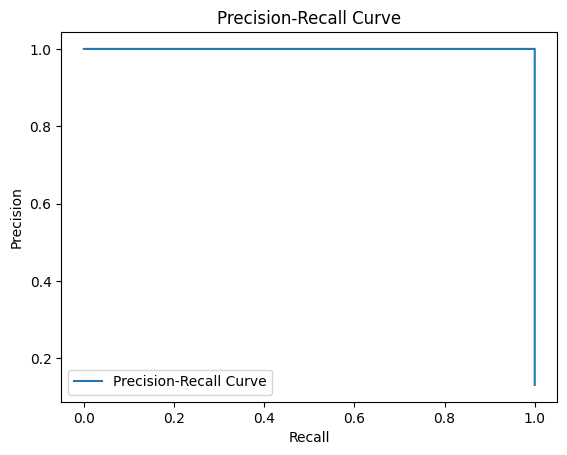

In [40]:
p, r, t = precision_recall_curve(msg_train['label'], LR_Classifier.predict_proba(msg_train['message'])[:,1],pos_label=1)
# plot the curve
plt.plot(r, p, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [41]:
auc_pr = auc(r,p)
# print the area under the curve
print('Area under the Precision-Recall Curve:', auc_pr)

Area under the Precision-Recall Curve: 1.0


### Confusion Matrix

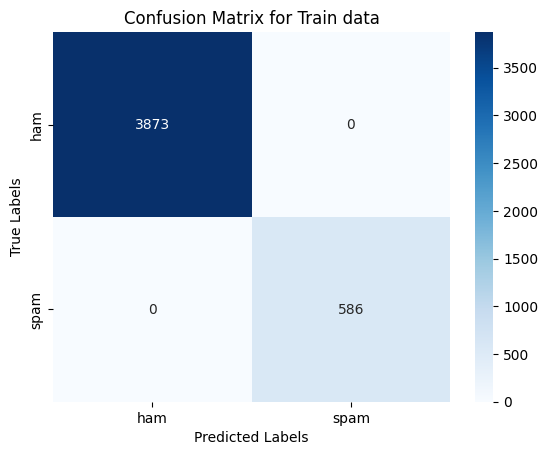

In [42]:
cm = confusion_matrix(msg_train['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Train data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Classification Report

In [43]:
print(classification_report(msg_train['label'],predictions,digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3873
           1     1.0000    1.0000    1.0000       586

    accuracy                         1.0000      4459
   macro avg     1.0000    1.0000    1.0000      4459
weighted avg     1.0000    1.0000    1.0000      4459



## Performance on Test Data

### Accuracy

In [44]:
predictions = LR_Classifier.predict(msg_test['message'])
accuracy = accuracy_score(msg_test['label'], predictions)
accuracy

0.9856502242152466

In [45]:
acc.append(accuracy)

### Precision

In [46]:
p = precision_score(msg_test['label'], predictions)
p

0.9559748427672956

In [47]:
precision.append(p)

### Recall

In [48]:
r = recall_score(msg_test['label'], predictions)
r

0.9440993788819876

In [49]:
recall.append(r)

### F1 Score

In [50]:
f = f1_score(msg_test['label'], predictions, pos_label=1)
f

0.95

In [51]:
f1.append(f)

### Precision-Recall Curve

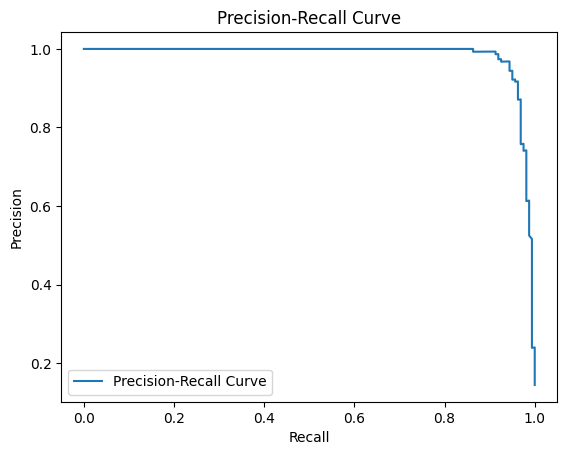

In [52]:
p, r, t = precision_recall_curve(msg_test['label'], LR_Classifier.predict_proba(msg_test['message'])[:,1],pos_label=1)
# plot the curve
plt.plot(r, p, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [53]:
auc_pr = auc(r,p)
# print the area under the curve
print('Area under the Precision-Recall Curve:', auc_pr)

Area under the Precision-Recall Curve: 0.9834448267450075


In [54]:
pr_auc.append(auc_pr)

### Confusion Matrix

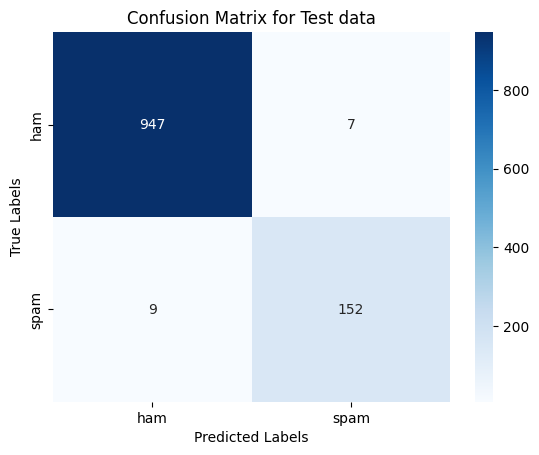

In [55]:
cm = confusion_matrix(msg_test['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Test data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Classification Report

In [56]:
print(classification_report(msg_test['label'], predictions,digits=4))

              precision    recall  f1-score   support

           0     0.9906    0.9927    0.9916       954
           1     0.9560    0.9441    0.9500       161

    accuracy                         0.9857      1115
   macro avg     0.9733    0.9684    0.9708      1115
weighted avg     0.9856    0.9857    0.9856      1115



# 3. Support Vector Machines

In [57]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Creating Pipeline

In [58]:
pipeline_svm = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC(probability=True, random_state=42))  # train on TF-IDF vectors w/ SVM classifier
])

## Cross Validation Score

In [59]:
scores = cross_val_score(pipeline_svm,  # steps to convert raw messages into models
                         msg_train['message'],  # training data
                         msg_train['label'],  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='f1',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores = faster
                         )
scores

array([0.9380531 , 0.96491228, 0.92727273, 0.97391304, 0.90740741,
       0.91743119, 0.85148515, 0.95495495, 0.92592593, 0.90566038])

In [60]:
scores.mean(), scores.std()

(np.float64(0.9267016155620056), np.float64(0.03342972760001904))

## Fitting the model

In [61]:
param_grid = {
    'classifier__C': [0.5 ,1, 5, 10],
    'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'classifier__gamma': ['scale', 'auto']
}

svm_classifier = GridSearchCV(pipeline_svm, param_grid, cv=3, scoring='f1',verbose=3, n_jobs=-1)
svm_classifier.fit(msg_train['message'], msg_train['label'])

print("Best parameters:", svm_classifier.best_params_)
print("Best score:", svm_classifier.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 3/3] END classifier__C=0.5, classifier__gamma=scale, classifier__kernel=sigmoid;, score=0.914 total time=   3.8s
[CV 3/3] END classifier__C=0.5, classifier__gamma=scale, classifier__kernel=linear;, score=0.920 total time=   4.1s
[CV 1/3] END classifier__C=0.5, classifier__gamma=scale, classifier__kernel=linear;, score=0.936 total time=   4.2s
[CV 2/3] END classifier__C=0.5, classifier__gamma=scale, classifier__kernel=linear;, score=0.917 total time=   4.3s
[CV 2/3] END classifier__C=0.5, classifier__gamma=scale, classifier__kernel=sigmoid;, score=0.908 total time=   4.5s
[CV 1/3] END classifier__C=0.5, classifier__gamma=scale, classifier__kernel=sigmoid;, score=0.921 total time=   4.6s
[CV 1/3] END classifier__C=0.5, classifier__gamma=auto, classifier__kernel=linear;, score=0.936 total time=   4.0s
[CV 2/3] END classifier__C=0.5, classifier__gamma=auto, classifier__kernel=linear;, score=0.917 total time=   3.9s
[CV 3/3] E

## Performance on Train Data

### Accuracy

In [62]:
predictions = svm_classifier.predict(msg_train['message'])
accuracy_score(msg_train['label'], predictions)

1.0

### Precision

In [63]:
precision_score(msg_train['label'], predictions)

1.0

### Recall

In [64]:
recall_score(msg_train['label'], predictions)

1.0

### F1 Score

In [65]:
f1_score(msg_train['label'], predictions, pos_label=1)

1.0

### Precision-Recall Curve

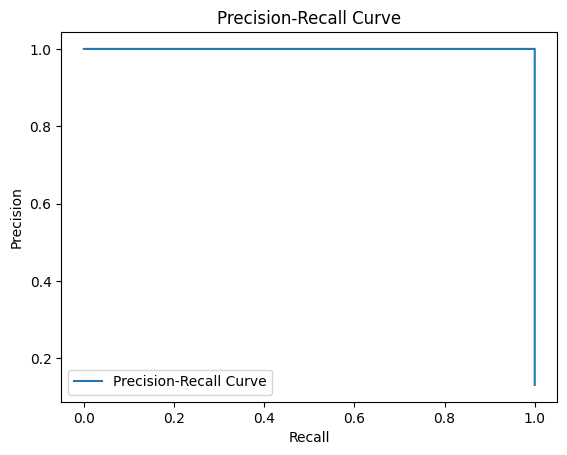

In [66]:
p, r, t = precision_recall_curve(msg_train['label'], svm_classifier.predict_proba(msg_train['message'])[:,1],pos_label=1)
# plot the curve
plt.plot(r, p, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [67]:
auc_pr = auc(r,p)
# print the area under the curve
print('Area under the Precision-Recall Curve:', auc_pr)

Area under the Precision-Recall Curve: 1.0


### Confusion Matrix

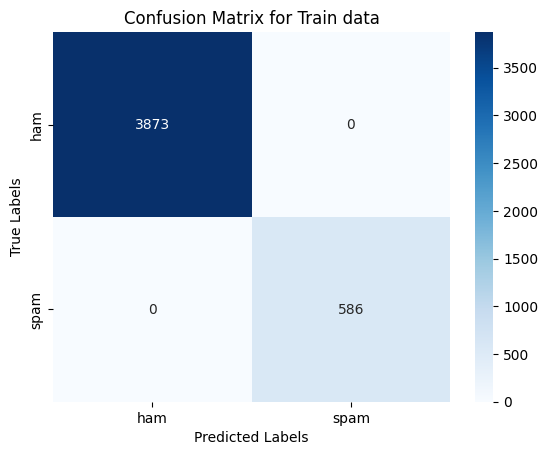

In [68]:
cm = confusion_matrix(msg_train['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Train data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Classification Report

In [69]:
print(classification_report(msg_train['label'], predictions, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3873
           1     1.0000    1.0000    1.0000       586

    accuracy                         1.0000      4459
   macro avg     1.0000    1.0000    1.0000      4459
weighted avg     1.0000    1.0000    1.0000      4459



## Performance on Test Data

### Accuracy

In [70]:
predictions = svm_classifier.predict(msg_test['message'])
accuracy = accuracy_score(msg_test['label'], predictions)
accuracy

0.9865470852017937

In [71]:
acc.append(accuracy)

### Precision

In [72]:
p = precision_score(msg_test['label'], predictions)
p

0.9802631578947368

In [73]:
precision.append(p)

### Recall

In [74]:
r = recall_score(msg_test['label'], predictions)
r

0.9254658385093167

In [75]:
recall.append(r)

### F1 Score

In [76]:
f = f1_score(msg_test['label'], predictions, pos_label=1)
f

0.952076677316294

In [77]:
f1.append(f)

### Precision-Recall Curve

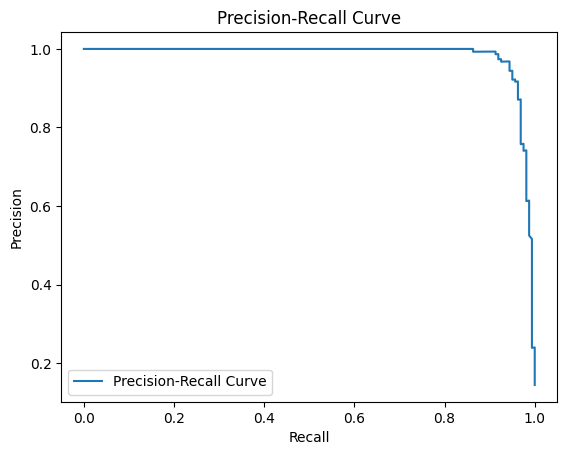

In [78]:
p, r, t = precision_recall_curve(msg_test['label'], LR_Classifier.predict_proba(msg_test['message'])[:,1],pos_label=1)
# plot the curve
plt.plot(r, p, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [79]:
auc_pr = auc(r,p)
# print the area under the curve
print('Area under the Precision-Recall Curve:', auc_pr)

Area under the Precision-Recall Curve: 0.9834448267450075


In [80]:
pr_auc.append(auc_pr)

### Confusion Matrix

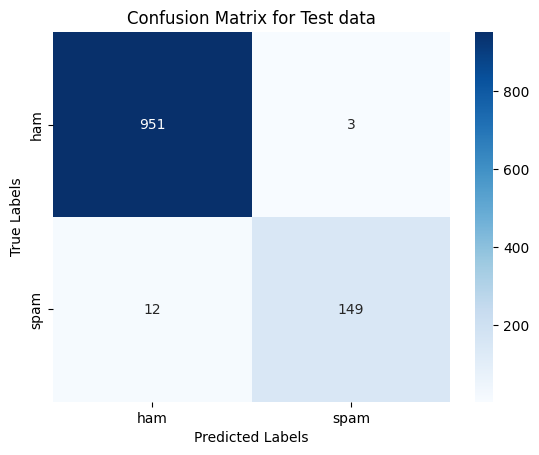

In [81]:
cm = confusion_matrix(msg_test['label'], predictions)
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['ham', 'spam'], yticklabels=['ham','spam'])
plt.title('Confusion Matrix for Test data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Classification Report

In [82]:
print(classification_report(msg_test['label'], predictions,digits=4))

              precision    recall  f1-score   support

           0     0.9875    0.9969    0.9922       954
           1     0.9803    0.9255    0.9521       161

    accuracy                         0.9865      1115
   macro avg     0.9839    0.9612    0.9721      1115
weighted avg     0.9865    0.9865    0.9864      1115



# Benchmarking the performance

In [83]:
pd.DataFrame({'Model':models, 'F1 Score':f1, 'Accuracy':acc, 'Precision':precision, 'Recall':recall, 'AUC-PR':pr_auc})

,Model,F1 Score,Accuracy,Precision,Recall,AUC-PR
0,Naive Bayes,0.951140,0.986547,1.000000,0.906832,0.982719
1,Logistic Regression,0.950000,0.985650,0.955975,0.944099,0.983445
2,Support Vector Machines,0.952077,0.986547,0.980263,0.925466,0.983445


# Best Model

We consider the following:
- Excessive spam can negatively impact user experience.
- Misclassifying ham as spam is more harmful than missing some spam.

Based on this, we prioritize high precision (to avoid misclassifying ham as spam) over high recall (since capturing all spam is less critical).

Since all models achieve a recall greater than 0.90 (meaning they are all fairly good at detecting spam), and Naive Bayes has the highest precision, it is the best choice for spam/ham classification.